# TESS Exoplanet Model Training (v2)
This notebook loads preprocessed data and trains AutoGluon models

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load preprocessed data
print("Loading preprocessed data...")
print("="*70)

df_final = pd.read_csv('tess_preprocessed_v1.csv')

print(f"✓ Data loaded successfully!")
print(f"  Shape: {df_final.shape[0]} rows × {df_final.shape[1]} columns")
print(f"\nFirst few rows:")
df_final.head()

Loading preprocessed data...
✓ Data loaded successfully!
  Shape: 7703 rows × 39 columns

First few rows:


,ra,dec,st_pmra,st_pmraerr1,st_pmraerr2,st_pmdec,st_pmdecerr1,st_pmdecerr2,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_trandurh,pl_trandurherr1,pl_trandurherr2,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_rade,pl_radeerr1,pl_radeerr2,pl_insol,pl_eqt,st_tmag,st_tmagerr1,st_tmagerr2,st_dist,st_disterr1,st_disterr2,st_teff,st_tefferr1,st_tefferr2,st_logg,st_rad,tfopwg_disp,spectral_class,planet_type
0,112.357708,-12.695960,-5.964,0.085,-0.085,-0.076,0.072,-0.072,2.459230e+06,0.001657,-0.001657,2.171348,0.000264,-0.000264,2.01722,0.319588,-0.319588,656.886099,37.778210,-37.778210,5.818163,1.910546,-1.910546,22601.948581,3127.204052,9.604000,0.013,-0.013,485.735,11.9515,-11.9515,10249.0,264.7,-264.7,4.19000,2.16986,3,1,0
1,122.580465,-5.513852,-4.956,0.102,-0.102,-15.555,0.072,-0.072,2.459988e+06,0.001916,-0.001916,1.931646,0.000005,-0.000005,3.16600,0.647000,-0.647000,1286.000000,1186.490000,-1186.490000,11.215400,2.624200,-2.624200,44464.500000,4045.000000,9.423440,0.006,-0.006,295.862,5.9100,-5.9100,7070.0,126.4,-126.4,4.03000,2.01000,5,2,0
2,104.726966,-10.580455,-1.462,0.206,-0.206,-2.249,0.206,-0.206,2.459225e+06,0.000625,-0.000625,1.867557,0.000003,-0.000003,1.40800,0.184000,-0.184000,1500.000000,1.758400,-1.758400,23.752900,0.814580,-0.814580,2860.610000,2037.000000,9.299501,0.058,-0.058,943.109,106.3330,-106.3330,8924.0,124.0,-124.0,4.20409,5.73000,3,0,0
3,110.559945,-25.207017,-0.939,0.041,-0.041,1.640,0.055,-0.055,2.458493e+06,0.005350,-0.005350,2.743230,0.001080,-0.001080,3.16700,0.642000,-0.642000,383.410000,0.781988,-0.781988,13.638000,0.814580,-0.814580,1177.360000,1631.000000,9.300300,0.037,-0.037,7728.170,1899.5700,-1899.5700,5388.5,567.0,-567.0,4.15000,1.50000,3,3,0
4,122.178195,-48.802811,-4.496,0.069,-0.069,9.347,0.062,-0.062,2.459987e+06,0.003748,-0.003748,3.573014,0.000013,-0.000013,3.37000,1.029000,-1.029000,755.000000,1306.550000,-1306.550000,11.311300,3.247140,-3.247140,54679.300000,4260.000000,9.135500,0.006,-0.006,356.437,4.6175,-4.6175,9219.0,171.1,-171.1,4.14000,2.15000,3,0,0


In [3]:
# Load encoding mappings for reference
print("Loading encoding mappings...")
print("="*70)

with open('encoding_mappings.json', 'r') as f:
    encoding_mappings = json.load(f)

print(f"✓ Encoding mappings loaded")
print(f"  Encoded columns: {list(encoding_mappings.keys())}")
print(f"\nEncoding details:")
for col, mapping in encoding_mappings.items():
    print(f"  {col}: {len(mapping)} categories")

Loading encoding mappings...
✓ Encoding mappings loaded
  Encoded columns: ['tfopwg_disp', 'spectral_class', 'planet_type']

Encoding details:
  tfopwg_disp: 6 categories
  spectral_class: 7 categories
  planet_type: 3 categories


In [4]:
# Display dataset info
print("Dataset Information:")
print("="*70)
print(f"Shape: {df_final.shape}")
print(f"\nColumns: {df_final.shape[1]}")
print(f"Rows: {df_final.shape[0]}")
print(f"\nData types:")
print(df_final.dtypes.value_counts())
print(f"\nMissing values: {df_final.isnull().sum().sum()}")
print(f"Memory usage: {df_final.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset Information:
Shape: (7703, 39)

Columns: 39
Rows: 7703

Data types:
float64    36
int64       3
Name: count, dtype: int64

Missing values: 0
Memory usage: 2.29 MB


## Train-Test Split Preparation
Prepare data for machine learning by removing ID columns and splitting into train/validation/test sets

In [4]:
# Step 1: Remove ID column (tid) as it's just an identifier
print("Step 1: Remove ID Column")
print("=" * 70)

if 'tid' in df_final.columns:
    print(f"Removing 'tid' column (identifier, not a feature)")
    print(f"  Current shape: {df_final.shape}")
    df_final = df_final.drop(columns=['tid'])
    print(f"  New shape: {df_final.shape}")
    print(f"  ✓ 'tid' column removed successfully")
else:
    print("  'tid' column not found in dataset")

print(f"\nRemaining columns: {len(df_final.columns)}")

Step 1: Remove ID Column
  'tid' column not found in dataset

Remaining columns: 39


In [5]:
# Step 2: Define target variable (tfopwg_disp) and features
print("\nStep 2: Define Target and Features")
print("=" * 70)

# Check if target column exists
if 'tfopwg_disp' not in df_final.columns:
    print("⚠ WARNING: 'tfopwg_disp' column not found in dataset!")
    print("\nAvailable columns:")
    print(df_final.columns.tolist())
else:
    # Define target variable
    target_col = 'tfopwg_disp'
    
    # Separate features (X) and target (y)
    X = df_final.drop(columns=[target_col])
    y = df_final[target_col]
    
    print(f"Target variable: {target_col}")
    print(f"  Shape: {y.shape}")
    print(f"  Data type: {y.dtype}")
    print(f"  Unique values: {y.nunique()}")
    
    # Check if it's classification or regression
    unique_ratio = y.nunique() / len(y)
    if unique_ratio < 0.05:  # Less than 5% unique values suggests classification
        task_type = "Classification"
        print(f"  Task type: {task_type}")
        print(f"  Class distribution:")
        print(y.value_counts().sort_index())
    else:
        task_type = "Regression"
        print(f"  Task type: {task_type}")
        print(f"  Statistics:")
        print(f"    Min: {y.min():.4f}")
        print(f"    Max: {y.max():.4f}")
        print(f"    Mean: {y.mean():.4f}")
        print(f"    Median: {y.median():.4f}")
        print(f"    Std: {y.std():.4f}")
    
    print(f"\nFeature matrix (X):")
    print(f"  Shape: {X.shape}")
    print(f"  Features: {X.shape[1]}")
    print(f"  Samples: {X.shape[0]}")
    
    print(f"\n✓ Target and features successfully separated")


Step 2: Define Target and Features
Target variable: tfopwg_disp
  Shape: (7703,)
  Data type: int64
  Unique values: 6
  Task type: Classification
  Class distribution:
tfopwg_disp
0     462
1     684
2      98
3    1197
4     583
5    4679
Name: count, dtype: int64

Feature matrix (X):
  Shape: (7703, 38)
  Features: 38
  Samples: 7703

✓ Target and features successfully separated


In [6]:
# Step 3: Split data into Train, Validation, and Test sets (Balanced Stratified Split)
from sklearn.model_selection import train_test_split

print("\nStep 3: Split Data into Train/Validation/Test Sets (Balanced Stratified)")
print("=" * 70)

# First, let's examine the class distribution
print("Current class distribution:")
class_counts = y.value_counts().sort_index()
print(class_counts)
print("\nClass percentages:")
class_percentages = y.value_counts(normalize=True).sort_index() * 100
print(class_percentages.round(2))

# Check if we have enough samples in each class for stratified splitting
min_class_count = class_counts.min()
print(f"\nSmallest class has {min_class_count} samples")

# Calculate how many samples we need for each split
test_samples_needed = int(0.15 * len(y))  # 15% for test
val_samples_needed = int(0.15 * len(y))   # 15% for validation

# Minimum samples needed per class for stratified split
min_samples_per_class_test = max(1, test_samples_needed // len(class_counts))
min_samples_per_class_val = max(1, val_samples_needed // len(class_counts))

print(f"Minimum samples needed per class for test set: {min_samples_per_class_test}")
print(f"Minimum samples needed per class for validation set: {min_samples_per_class_val}")

# Check if stratification is possible
can_stratify = min_class_count >= (min_samples_per_class_test + min_samples_per_class_val + 1)

if can_stratify:
    print("✓ Stratified sampling is possible for all classes")
    
    # Split ratios: 70% train, 15% validation, 15% test
    # First split: 70% train, 30% temp (validation + test)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.30, random_state=42, stratify=y
    )
    
    # Second split: Split temp into 50% validation, 50% test (15% each of total)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
    )
    
    print(f"\n✓ Used stratified sampling for balanced class distribution")
    
else:
    print("⚠ WARNING: Some classes have too few samples for perfect stratification")
    print("Using stratified sampling where possible, but some classes may be slightly imbalanced")
    
    # Try stratified split anyway, sklearn will do its best
    try:
        X_train, X_temp, y_train, y_temp = train_test_split(
            X, y, test_size=0.30, random_state=42, stratify=y
        )
        
        X_val, X_test, y_val, y_test = train_test_split(
            X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
        )
        print("✓ Stratified sampling completed successfully")
        
    except ValueError as e:
        print(f"⚠ Stratification failed: {e}")
        print("Falling back to random sampling without stratification")
        
        X_train, X_temp, y_train, y_temp = train_test_split(
            X, y, test_size=0.30, random_state=42
        )
        
        X_val, X_test, y_val, y_test = train_test_split(
            X_temp, y_temp, test_size=0.50, random_state=42
        )

print(f"\nSplit ratios: 70% Train, 15% Validation, 15% Test")
print(f"\nDataset splits:")
print(f"  Training set:")
print(f"    X_train shape: {X_train.shape} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"    y_train shape: {y_train.shape}")
print(f"\n  Validation set:")
print(f"    X_val shape: {X_val.shape} ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"    y_val shape: {y_val.shape}")
print(f"\n  Test set:")
print(f"    X_test shape: {X_test.shape} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"    y_test shape: {y_test.shape}")

# Display class distribution in each split
print(f"\n{'='*70}")
print("Class distribution in each split:")
print(f"{'='*70}")

print("\nTRAINING SET:")
train_dist = y_train.value_counts().sort_index()
train_pct = y_train.value_counts(normalize=True).sort_index() * 100
for class_label in class_counts.index:
    count = train_dist.get(class_label, 0)
    pct = train_pct.get(class_label, 0)
    print(f"  Class {class_label}: {count:4} samples ({pct:5.1f}%)")

print("\nVALIDATION SET:")
val_dist = y_val.value_counts().sort_index()
val_pct = y_val.value_counts(normalize=True).sort_index() * 100
for class_label in class_counts.index:
    count = val_dist.get(class_label, 0)
    pct = val_pct.get(class_label, 0)
    print(f"  Class {class_label}: {count:4} samples ({pct:5.1f}%)")

print("\nTEST SET:")
test_dist = y_test.value_counts().sort_index()
test_pct = y_test.value_counts(normalize=True).sort_index() * 100
for class_label in class_counts.index:
    count = test_dist.get(class_label, 0)
    pct = test_pct.get(class_label, 0)
    print(f"  Class {class_label}: {count:4} samples ({pct:5.1f}%)")

print(f"\n✓ Data successfully split into train/validation/test sets with balanced distribution")


Step 3: Split Data into Train/Validation/Test Sets (Balanced Stratified)
Current class distribution:
tfopwg_disp
0     462
1     684
2      98
3    1197
4     583
5    4679
Name: count, dtype: int64

Class percentages:
tfopwg_disp
0     6.00
1     8.88
2     1.27
3    15.54
4     7.57
5    60.74
Name: proportion, dtype: float64

Smallest class has 98 samples
Minimum samples needed per class for test set: 192
Minimum samples needed per class for validation set: 192
⚠ WARNING: Some classes have too few samples for perfect stratification
Using stratified sampling where possible, but some classes may be slightly imbalanced
✓ Stratified sampling completed successfully

Split ratios: 70% Train, 15% Validation, 15% Test

Dataset splits:
  Training set:
    X_train shape: (5392, 38) (70.0%)
    y_train shape: (5392,)

  Validation set:
    X_val shape: (1155, 38) (15.0%)
    y_val shape: (1155,)

  Test set:
    X_test shape: (1156, 38) (15.0%)
    y_test shape: (1156,)

Class distribution in


Step 4: Target Distribution Across Splits

Class distribution in each split:


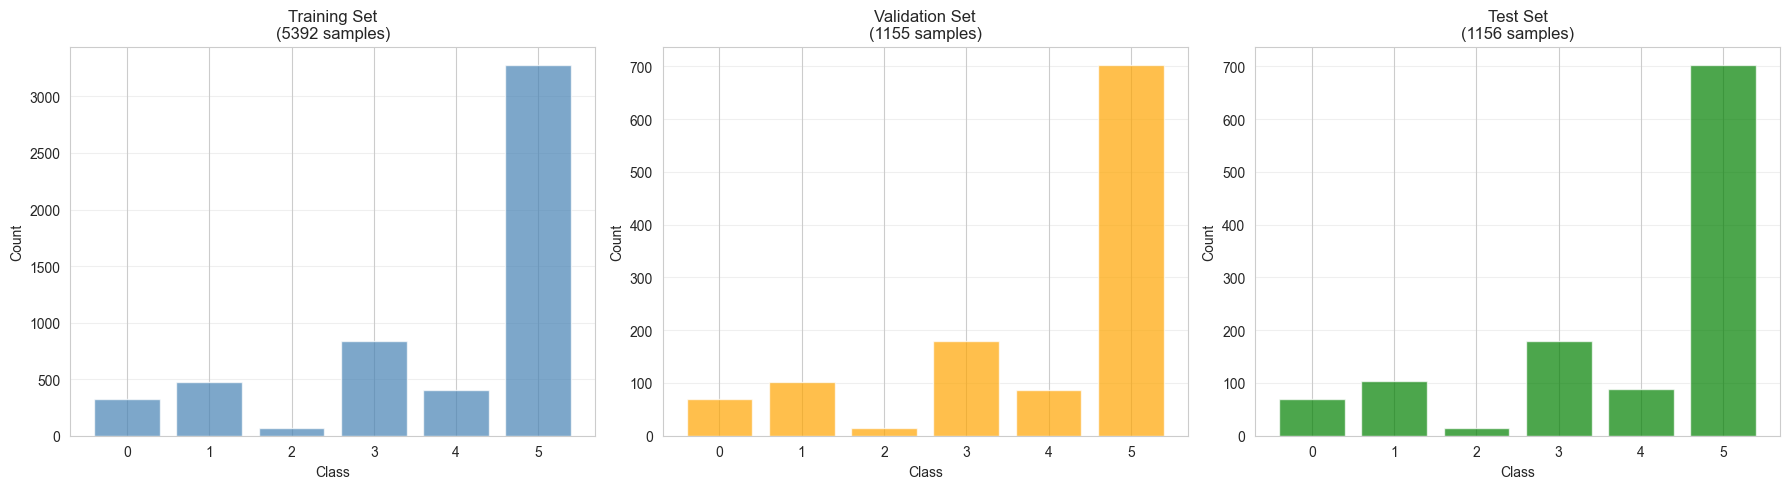


Percentage distribution:
  Training:   {0: 0.0599, 1: 0.0888, 2: 0.0128, 3: 0.1554, 4: 0.0757, 5: 0.6074}
  Validation: {0: 0.0606, 1: 0.0883, 2: 0.013, 3: 0.155, 4: 0.0753, 5: 0.6078}
  Test:       {0: 0.0597, 1: 0.0891, 2: 0.0121, 3: 0.1557, 4: 0.0761, 5: 0.6073}

✓ Target distribution is balanced across splits


In [7]:
# Step 4: Display target distribution across splits
print("\nStep 4: Target Distribution Across Splits")
print("=" * 70)

if task_type == "Classification":
    print("\nClass distribution in each split:")
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Training set
    train_dist = y_train.value_counts().sort_index()
    axes[0].bar(range(len(train_dist)), train_dist.values, color='steelblue', alpha=0.7)
    axes[0].set_title(f'Training Set\n({len(y_train)} samples)')
    axes[0].set_xlabel('Class')
    axes[0].set_ylabel('Count')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Validation set
    val_dist = y_val.value_counts().sort_index()
    axes[1].bar(range(len(val_dist)), val_dist.values, color='orange', alpha=0.7)
    axes[1].set_title(f'Validation Set\n({len(y_val)} samples)')
    axes[1].set_xlabel('Class')
    axes[1].set_ylabel('Count')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    # Test set
    test_dist = y_test.value_counts().sort_index()
    axes[2].bar(range(len(test_dist)), test_dist.values, color='green', alpha=0.7)
    axes[2].set_title(f'Test Set\n({len(y_test)} samples)')
    axes[2].set_xlabel('Class')
    axes[2].set_ylabel('Count')
    axes[2].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print("\nPercentage distribution:")
    print(f"  Training:   {dict(y_train.value_counts(normalize=True).sort_index().round(4))}")
    print(f"  Validation: {dict(y_val.value_counts(normalize=True).sort_index().round(4))}")
    print(f"  Test:       {dict(y_test.value_counts(normalize=True).sort_index().round(4))}")

else:  # Regression
    print("\nTarget statistics in each split:")
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Training set
    axes[0].hist(y_train, bins=30, color='steelblue', alpha=0.7, edgecolor='black')
    axes[0].axvline(y_train.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {y_train.mean():.3f}')
    axes[0].set_title(f'Training Set\n({len(y_train)} samples)')
    axes[0].set_xlabel('Target Value')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Validation set
    axes[1].hist(y_val, bins=30, color='orange', alpha=0.7, edgecolor='black')
    axes[1].axvline(y_val.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {y_val.mean():.3f}')
    axes[1].set_title(f'Validation Set\n({len(y_val)} samples)')
    axes[1].set_xlabel('Target Value')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3, axis='y')
    
    # Test set
    axes[2].hist(y_test, bins=30, color='green', alpha=0.7, edgecolor='black')
    axes[2].axvline(y_test.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {y_test.mean():.3f}')
    axes[2].set_title(f'Test Set\n({len(y_test)} samples)')
    axes[2].set_xlabel('Target Value')
    axes[2].set_ylabel('Frequency')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    stats_df = pd.DataFrame({
        'Train': y_train.describe(),
        'Validation': y_val.describe(),
        'Test': y_test.describe()
    })
    print("\nStatistics comparison:")
    print(stats_df)

print("\n✓ Target distribution is balanced across splits")

In [8]:
# Step 5: Display feature list
print("\nStep 5: Feature Summary")
print("=" * 70)

print(f"\nTotal features: {len(X_train.columns)}")
print(f"\nFeature list:")
for i, col in enumerate(X_train.columns, 1):
    dtype = X_train[col].dtype
    print(f"  {i:2}. {col:30} ({dtype})")

print(f"\n{'='*70}")
print(f"Feature matrix ready:")
print(f"  ✓ {len(X_train.columns)} features")
print(f"  ✓ All features are numerical")
print(f"  ✓ No missing values")
print(f"  ✓ No ID columns")


Step 5: Feature Summary

Total features: 38

Feature list:
   1. ra                             (float64)
   2. dec                            (float64)
   3. st_pmra                        (float64)
   4. st_pmraerr1                    (float64)
   5. st_pmraerr2                    (float64)
   6. st_pmdec                       (float64)
   7. st_pmdecerr1                   (float64)
   8. st_pmdecerr2                   (float64)
   9. pl_tranmid                     (float64)
  10. pl_tranmiderr1                 (float64)
  11. pl_tranmiderr2                 (float64)
  12. pl_orbper                      (float64)
  13. pl_orbpererr1                  (float64)
  14. pl_orbpererr2                  (float64)
  15. pl_trandurh                    (float64)
  16. pl_trandurherr1                (float64)
  17. pl_trandurherr2                (float64)
  18. pl_trandep                     (float64)
  19. pl_trandeperr1                 (float64)
  20. pl_trandeperr2                 (float64)


In [9]:
# Step 6: Final summary - Ready for model training
print("\nStep 6: Final Data Preparation Summary")
print("=" * 70)

print(f"\n📊 DATASET SUMMARY:")
print(f"{'='*70}")
print(f"\n🎯 Target Variable: {target_col}")
print(f"   Type: {task_type}")
print(f"   Unique values: {y.nunique()}")

print(f"\n📁 Data Splits:")
print(f"   Training:   {X_train.shape[0]:5} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Validation: {X_val.shape[0]:5} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"   Test:       {X_test.shape[0]:5} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"   Total:      {len(X):5} samples (100.0%)")

print(f"\n🔢 Features:")
print(f"   Number of features: {X_train.shape[1]}")
print(f"   All numerical: ✓")
print(f"   No missing values: ✓")
print(f"   No ID columns: ✓")

print(f"\n✅ DATA PREPARATION COMPLETE!")
print(f"{'='*70}")
print(f"\n🚀 Ready for model training with AutoGluon")
print(f"\nNext steps:")
print(f"  1. Train AutoGluon model on training data")
print(f"  2. Evaluate on validation set for hyperparameter tuning")
print(f"  3. Final evaluation on test set")
print(f"\nDatasets available:")
print(f"  - X_train, y_train: For training")
print(f"  - X_val, y_val: For validation")
print(f"  - X_test, y_test: For final testing")


Step 6: Final Data Preparation Summary

📊 DATASET SUMMARY:

🎯 Target Variable: tfopwg_disp
   Type: Classification
   Unique values: 6

📁 Data Splits:
   Training:    5392 samples (70.0%)
   Validation:  1155 samples (15.0%)
   Test:        1156 samples (15.0%)
   Total:       7703 samples (100.0%)

🔢 Features:
   Number of features: 38
   All numerical: ✓
   No missing values: ✓
   No ID columns: ✓

✅ DATA PREPARATION COMPLETE!

🚀 Ready for model training with AutoGluon

Next steps:
  1. Train AutoGluon model on training data
  2. Evaluate on validation set for hyperparameter tuning
  3. Final evaluation on test set

Datasets available:
  - X_train, y_train: For training
  - X_val, y_val: For validation
  - X_test, y_test: For final testing


## AutoGluon Model Training
Build and train machine learning models using AutoGluon's automated ML framework

In [10]:
# Install AutoGluon if not already installed
# Run this cell first to install AutoGluon
try:
    import autogluon
    from autogluon.tabular import __version__ as autogluon_version
    print("✓ AutoGluon is already installed")
    print(f"  Version: {autogluon_version}")
except ImportError:
    print("Installing AutoGluon...")
    print("This may take a few minutes...")
    import sys
    !{sys.executable} -m pip install autogluon

✓ AutoGluon is already installed
  Version: 1.4.0


In [11]:
# Import AutoGluon TabularPredictor
from autogluon.tabular import TabularPredictor, TabularDataset

print("AutoGluon imported successfully!")
print("=" * 70)

AutoGluon imported successfully!


In [12]:
# Prepare data for AutoGluon
# AutoGluon works with DataFrames that include the target column
print("Preparing data for AutoGluon...")
print("=" * 70)

# Combine features and target for training and validation
train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

print(f"Training data shape: {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"\nTarget column: '{target_col}'")
print(f"Task type: {task_type}")
print(f"\n✓ Data prepared for AutoGluon")

Preparing data for AutoGluon...
Training data shape: (5392, 39)
Validation data shape: (1155, 39)
Test data shape: (1156, 39)

Target column: 'tfopwg_disp'
Task type: Classification

✓ Data prepared for AutoGluon


In [13]:
# Initialize AutoGluon TabularPredictor
print("Initializing AutoGluon TabularPredictor...")
print("=" * 70)

# Determine the problem type and evaluation metric
if task_type == "Classification":
    # For classification
    problem_type = 'binary' if y.nunique() == 2 else 'multiclass'
    eval_metric = 'accuracy'  # Can also use 'f1', 'roc_auc', etc.
else:
    # For regression
    problem_type = 'regression'
    eval_metric = 'r2'  # Can also use 'rmse', 'mse', 'mae', etc.

print(f"Problem type: {problem_type}")
print(f"Evaluation metric: {eval_metric}")
print(f"Target column: {target_col}")

# Initialize the predictor
predictor = TabularPredictor(
    label=target_col,
    problem_type=problem_type,
    eval_metric=eval_metric,
    path='./autogluon_models'  # Directory to save models
)

print(f"\n✓ TabularPredictor initialized")
print(f"  Models will be saved in: './autogluon_models'")
print(f"  Label: {target_col}")
print(f"  Problem type: {problem_type}")
print(f"  Evaluation metric: {eval_metric}")

Initializing AutoGluon TabularPredictor...
Problem type: multiclass
Evaluation metric: accuracy
Target column: tfopwg_disp

✓ TabularPredictor initialized
  Models will be saved in: './autogluon_models'
  Label: tfopwg_disp
  Problem type: multiclass
  Evaluation metric: accuracy


In [14]:
# Train AutoGluon models
print("Starting AutoGluon training...")
print("=" * 70)
print("This may take several minutes to hours depending on:")
print("  - Dataset size")
print("  - Number of features")
print("  - Time limit")
print("  - Hardware capabilities")
print(f"\n{'='*70}")

# Train the model with medium quality preset
# You can adjust time_limit and presets based on your needs
predictor.fit(
    train_data=train_data,
    tuning_data=val_data,  # Use validation set for hyperparameter tuning
    time_limit=600,  # 10 minutes (600 seconds) - adjust as needed
    presets='medium_quality',  # Options: 'best_quality', 'high_quality', 'good_quality', 'medium_quality', 'optimize_for_deployment'
    num_bag_folds=5,  # Number of folds for bagging (ensemble)
    num_bag_sets=1,
    num_stack_levels=0,  # 0 for no stacking, 1-2 for stacking
    use_bag_holdout=True,  # IMPORTANT: Allow using tuning_data with bagging
    verbosity=2  # 0: no output, 1: minimal, 2: detailed, 3: very detailed
)

print(f"\n{'='*70}")
print("✓ Training complete!")

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.3
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
Memory Avail:       23.35 GB / 39.71 GB (58.8%)
Disk Space Avail:   301.02 GB / 931.50 GB (32.3%)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.3
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
Memory Avail:       23.35 GB / 39.71 GB (58.8%)
Disk Space Avail:   301.02 GB / 931.50 GB (32.3%)
Presets specified: ['medium_quality']
Presets specified: ['medium_quality']
Using hyperparameters preset: hyperparameters='default'
Using hyperparameters preset: hyperparameters='default'


Starting AutoGluon training...
This may take several minutes to hours depending on:
  - Dataset size
  - Number of features
  - Time limit
  - Hardware capabilities



Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "f:\code\My GitHub\nasa-space-apps-workfield\tess\autogluon_models"
Train Data Rows:    5392
Train Data Columns: 38
Tuning Data Rows:    1155
Tuning Data Columns: 38
Label Column:       tfopwg_disp
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 6
AutoGluon will save models to "f:\code\My GitHub\nasa-space-apps-workfield\tess\autogluon_models"
Train Data Rows:    5392
Train Data Columns: 38
Tuning Data Rows:    1155
Tuning Data Columns: 38
Label Column:       tfopwg_disp
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 6
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    23912.84 MB
	Train Data (Original)  Memory Usage: 1.90 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dty


✓ Training complete!


In [15]:
# Display model leaderboard
print("\nModel Leaderboard:")
print("=" * 70)

leaderboard = predictor.leaderboard(train_data, silent=True)
print(leaderboard)

print(f"\n{'='*70}")
# Get the best model name from the leaderboard (first row is the best)
best_model = leaderboard.index[0] if len(leaderboard) > 0 else "No models found"
print(f"Best model: {best_model}")
print(f"Total models trained: {len(leaderboard)}")


Model Leaderboard:
                      model  score_test  score_val eval_metric  \
0   RandomForestGini_BAG_L1    1.000000   0.712554    accuracy   
1     ExtraTreesGini_BAG_L1    1.000000   0.702165    accuracy   
2   RandomForestEntr_BAG_L1    1.000000   0.702165    accuracy   
3     ExtraTreesEntr_BAG_L1    1.000000   0.701299    accuracy   
4           LightGBM_BAG_L1    1.000000   0.729004    accuracy   
5      LightGBMLarge_BAG_L1    1.000000   0.722944    accuracy   
6         LightGBMXT_BAG_L1    0.970512   0.721212    accuracy   
7       WeightedEnsemble_L2    0.955119   0.735065    accuracy   
8           CatBoost_BAG_L1    0.934533   0.726407    accuracy   
9     NeuralNetTorch_BAG_L1    0.751298   0.705628    accuracy   
10   NeuralNetFastAI_BAG_L1    0.740912   0.688312    accuracy   

    pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  \
0         0.202451       0.138494    2.744983                 0.202451   
1         0.239473       0.193706    0.

In [16]:
# Evaluate on validation set
print("\nEvaluation on Validation Set:")
print("=" * 70)

val_performance = predictor.evaluate(val_data, silent=True)
print(f"\nValidation Performance:")
for metric, value in val_performance.items():
    print(f"  {metric}: {value:.4f}")

print(f"\n✓ Validation evaluation complete")


Evaluation on Validation Set:

Validation Performance:
  accuracy: 0.7351
  balanced_accuracy: 0.4351
  mcc: 0.5064

✓ Validation evaluation complete

Validation Performance:
  accuracy: 0.7351
  balanced_accuracy: 0.4351
  mcc: 0.5064

✓ Validation evaluation complete


In [17]:
# Make predictions on test set
print("\nMaking Predictions on Test Set:")
print("=" * 70)

# Get predictions
y_pred_test = predictor.predict(test_data.drop(columns=[target_col]))

print(f"Predictions generated: {len(y_pred_test)}")
print(f"\nFirst 10 predictions:")
print(y_pred_test.head(10))

# Get prediction probabilities (only for classification)
if task_type == "Classification":
    y_pred_proba = predictor.predict_proba(test_data.drop(columns=[target_col]))
    print(f"\nPrediction probabilities shape: {y_pred_proba.shape}")
    print(f"First 5 probability predictions:")
    print(y_pred_proba.head(5))

print(f"\n✓ Predictions complete")


Making Predictions on Test Set:
Predictions generated: 1156

First 10 predictions:
116     5
4016    3
6351    5
712     5
4331    5
860     5
7113    5
5624    5
6851    5
3843    3
Name: tfopwg_disp, dtype: int64
Predictions generated: 1156

First 10 predictions:
116     5
4016    3
6351    5
712     5
4331    5
860     5
7113    5
5624    5
6851    5
3843    3
Name: tfopwg_disp, dtype: int64

Prediction probabilities shape: (1156, 6)
First 5 probability predictions:
             0         1         2         3         4         5
116   0.005093  0.184259  0.008953  0.210727  0.003098  0.587870
4016  0.009948  0.009454  0.010375  0.676928  0.006765  0.286530
6351  0.004075  0.108520  0.000852  0.026839  0.002343  0.857371
712   0.131294  0.232190  0.003917  0.077059  0.081814  0.473727
4331  0.033548  0.017171  0.000166  0.010928  0.113585  0.824603

✓ Predictions complete

Prediction probabilities shape: (1156, 6)
First 5 probability predictions:
             0         1         2 

In [18]:
# Evaluate on test set
print("\nFinal Evaluation on Test Set:")
print("=" * 70)

test_performance = predictor.evaluate(test_data, silent=True)
print(f"\nTest Performance:")
for metric, value in test_performance.items():
    print(f"  {metric}: {value:.4f}")

print(f"\n✓ Test evaluation complete")


Final Evaluation on Test Set:

Test Performance:
  accuracy: 0.7163
  balanced_accuracy: 0.4151
  mcc: 0.4625

✓ Test evaluation complete

Test Performance:
  accuracy: 0.7163
  balanced_accuracy: 0.4151
  mcc: 0.4625

✓ Test evaluation complete



Detailed Performance Metrics:

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.13      0.20        69
           1       0.65      0.42      0.51       103
           2       1.00      0.14      0.25        14
           3       0.67      0.48      0.56       180
           4       0.74      0.39      0.51        88
           5       0.73      0.93      0.82       702

    accuracy                           0.72      1156
   macro avg       0.71      0.42      0.48      1156
weighted avg       0.70      0.72      0.68      1156


Confusion Matrix:
[[  9   1   0  15   0  44]
 [  0  43   0   2   5  53]
 [  0   0   2   3   0   9]
 [  1   5   0  87   2  85]
 [  0   3   0   1  34  50]
 [  9  14   0  21   5 653]]


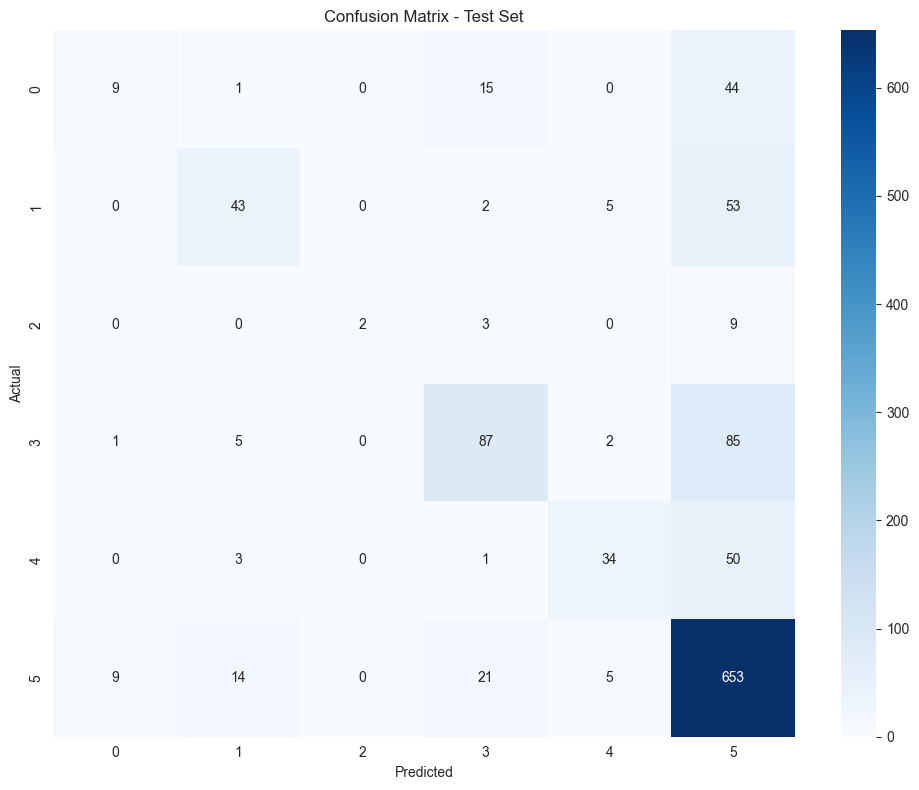


✓ Detailed metrics calculated and visualized


In [19]:
# Detailed performance metrics
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score

print("\nDetailed Performance Metrics:")
print("=" * 70)

if task_type == "Classification":
    # Classification metrics
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_test))
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred_test)
    print(cm)
    
    # Visualize confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.title('Confusion Matrix - Test Set')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    
else:
    # Regression metrics
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    
    print(f"\nRegression Metrics:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")
    
    # Visualize predictions vs actual
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Scatter plot
    axes[0].scatter(y_test, y_pred_test, alpha=0.5, s=30, edgecolors='black', linewidth=0.5)
    axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect prediction')
    axes[0].set_xlabel('Actual Values')
    axes[0].set_ylabel('Predicted Values')
    axes[0].set_title('Predicted vs Actual Values')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Residual plot
    residuals = y_test - y_pred_test
    axes[1].scatter(y_pred_test, residuals, alpha=0.5, s=30, edgecolors='black', linewidth=0.5)
    axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
    axes[1].set_xlabel('Predicted Values')
    axes[1].set_ylabel('Residuals')
    axes[1].set_title('Residual Plot')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print(f"\n✓ Detailed metrics calculated and visualized")

Computing feature importance via permutation shuffling for 38 features using 1156 rows with 5 shuffle sets...



Feature Importance Analysis:


	206.09s	= Expected runtime (41.22s per shuffle set)
	98.11s	= Actual runtime (Completed 5 of 5 shuffle sets)
	98.11s	= Actual runtime (Completed 5 of 5 shuffle sets)



Top 20 Most Important Features:
                 importance    stddev   p_value  n  p99_high   p99_low
st_tmag            0.049654  0.004308  0.000007  5  0.058524  0.040784
pl_tranmid         0.027855  0.005553  0.000180  5  0.039287  0.016422
dec                0.013322  0.002776  0.000214  5  0.019038  0.007605
pl_trandep         0.011765  0.005886  0.005541  5  0.023884 -0.000355
pl_rade            0.010035  0.003384  0.001342  5  0.017002  0.003068
pl_trandurh        0.007266  0.005492  0.020803  5  0.018574 -0.004041
ra                 0.006055  0.001934  0.001096  5  0.010038  0.002073
pl_orbpererr1      0.004152  0.002959  0.017460  5  0.010245 -0.001940
pl_orbper          0.003287  0.003840  0.064047  5  0.011193 -0.004618
st_dist            0.002595  0.003294  0.076460  5  0.009378 -0.004187
st_logg            0.002595  0.004932  0.152279  5  0.012749 -0.007559
st_disterr2        0.002249  0.001686  0.020321  5  0.005721 -0.001223
pl_orbpererr2      0.002076  0.000986  0.004

KeyError: 'feature'

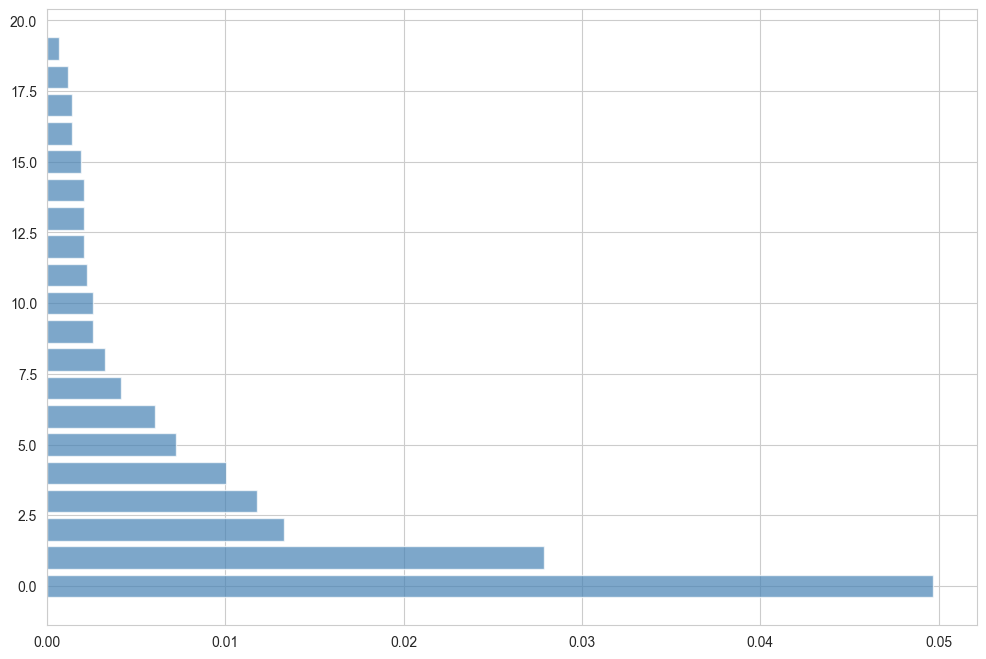

In [20]:
# Feature importance analysis
print("\nFeature Importance Analysis:")
print("=" * 70)

# Get feature importance
feature_importance = predictor.feature_importance(test_data)

print("\nTop 20 Most Important Features:")
print(feature_importance.head(20))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(20)
plt.barh(range(len(top_features)), top_features['importance'].values, color='steelblue', alpha=0.7)
plt.yticks(range(len(top_features)), top_features['feature'].values)
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print(f"\n✓ Feature importance analysis complete")

In [23]:
# Model summary and final results
print("\n" + "="*70)
print("MODEL TRAINING SUMMARY")
print("="*70)

print(f"\n📊 Dataset Information:")
print(f"   Training samples: {len(train_data)}")
print(f"   Validation samples: {len(val_data)}")
print(f"   Test samples: {len(test_data)}")
print(f"   Total features: {len(X_train.columns)}")

print(f"\n🎯 Target Variable:")
print(f"   Name: {target_col}")
print(f"   Type: {task_type}")
print(f"   Problem type: {problem_type}")

print(f"\n🤖 Model Information:")
# Get the best model name from the leaderboard (first row is the best)
best_model_name = leaderboard.index[0] if len(leaderboard) > 0 else "No models found"
print(f"   Best model: {best_model_name}")
print(f"   Total models trained: {len(leaderboard)}")
print(f"   Model directory: ./autogluon_models")

print(f"\n📈 Performance:")
print(f"   Validation {eval_metric}: {val_performance.get(eval_metric, 'N/A'):.4f}" if isinstance(val_performance.get(eval_metric, 0), (int, float)) else f"   Validation: {val_performance}")
print(f"   Test {eval_metric}: {test_performance.get(eval_metric, 'N/A'):.4f}" if isinstance(test_performance.get(eval_metric, 0), (int, float)) else f"   Test: {test_performance}")

print(f"\n✅ MODEL TRAINING COMPLETE!")
print(f"{'='*70}")
print(f"\nThe model is ready for:")
print(f"  ✓ Making predictions on new data")
print(f"  ✓ Further analysis and interpretation")
print(f"  ✓ Deployment to production")
print(f"\nTo make predictions on new data:")
print(f"  predictions = predictor.predict(new_data)")


MODEL TRAINING SUMMARY

📊 Dataset Information:
   Training samples: 5392
   Validation samples: 1155
   Test samples: 1156
   Total features: 38

🎯 Target Variable:
   Name: tfopwg_disp
   Type: Classification
   Problem type: multiclass

🤖 Model Information:
   Best model: 0
   Total models trained: 11
   Model directory: ./autogluon_models

📈 Performance:
   Validation accuracy: 0.7351
   Test accuracy: 0.7163

✅ MODEL TRAINING COMPLETE!

The model is ready for:
  ✓ Making predictions on new data
  ✓ Further analysis and interpretation
  ✓ Deployment to production

To make predictions on new data:
  predictions = predictor.predict(new_data)
